# Assignment 1

## Question 1 - Root finding using bisection method

Begin by considering the polynomial:

$f(x) = 1.80 - 4.05x + 0.40x^2 + x^3$
 
which has three real roots at $x=-2.5,0.5,1.5$.

a)	Calculate the roots of this polynomial using the bisection algorithm. You can start with the file called root_find_basic.ipynb and then modify as appropriate.  The program should fill an array of 10,000 data points between $x=-4.0$ and $x=4.0$.  Then, the program should do a sparse search of this array, i.e. once every n_search elements, to look for sign changes, and subsequently using the bisection algorithm to find the root.  The program should also keep track of the time taken to find the roots.

b)	Create a plot of the time taken to find the roots vs. the sparsification size (n_search), for n_search values between 1 and 10,000.  You can start with root_find_complete.ipynb and then modify it.

c)	Deduce the source of the various patterns that you observe in part b).  Hint:  You might consider adjusting the number of data points in the original array, as well as the coefficients of the polynomial, slightly.

d)	Modify the code created in part a) to allow for the possibility to find the roots of other polynomials or functions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import time

In [ ]:
# define a generator function for the polynomial
def generator_function(x,coe,expo):
  func = 0
  for i in range(0, len(coe)):
    func += coe[i]*(x**expo[i])
  return func

# Set the x limits, and the number of points, and calculate the interval
xl = -4.0
xh = 4.0
npoints = 10000

dx = (xh-xl)/npoints

xroots = []
yroots = []
xstep = []
ystep = []

coe = np.array([1.80,-4.05,0.4,1.0]) # Set function coefficients
expo = np.array([0,1,2,3]) # Set function exponents
nroots_expected = 3

In [ ]:
# Define the data arrays (x and y)
xval = np.arange(xl,xh,dx)
yval = generator_function(xval,coe,expo)

In [ ]:
for nsearch in range(1,10000):
    
    start = time.time()

    niter = npoints/nsearch
    ycomp = yval[0]
    nroots_found = 0

    for i in range(0,int(niter)):
        y = yval[nsearch*i]
        if (y==0):
            if (nsearch == 1):
                print ("Found exact root at x = %f\n" % xval[nsearch*i])
            nroots_found = nroots_found + 1
        if (y*ycomp<0.0):
            xlow = xval[nsearch*(i-1)]
            xhigh = xval[nsearch*i]
            epsilon = 1.0E-10
            diff = 1.0E12
            while (diff>epsilon):
                fa = generator_function(xlow,coe,expo)
                fb = generator_function(xhigh,coe,expo)
                xmid = (xhigh+xlow)/2.0
                fc = generator_function(xmid,coe,expo)
                product = fa*fc
                if (product < 0):
                    xhigh = xmid
                else:
                    xlow = xmid

                diff = np.abs(fc)

            if (nsearch == 1):
                print ("Found root at x = %f\n" % xmid)
            nroots_found = nroots_found + 1
            ycomp = y
        else:
            ycomp = y

    if (nsearch == 1):
        print ("Total number of roots found = %d\n" % nroots_found)
    
    xstep.append(nsearch)
    
    end = time.time()
    
    if (nroots_found == nroots_expected):
        ystep.append(1000.0*(end-start))
    else:
        ystep.append(30)
        # print("Incorrect roots")

Found root at x = -2.451530

Found root at x = 0.508987

Found root at x = 1.442544

Total number of roots found = 3



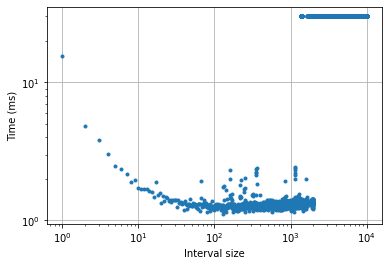

In [ ]:
# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1) 

# On the first axis, plot the sine and label the ordinate
plt.yscale('log')
plt.xscale('log')
axs.plot(xstep,ystep,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Interval size')
axs.axhline()
plt.grid(True)
# axs.set_xlim(1100,1200)
plt.show()

# Source of Patterns
I did not notice much of a change when adjusting the values of the coefficients (assuming that "slightly" meant less than +/- 1.0 change.

However, I did notice significant changes when adjusting the number of points in the original array. In these changes, I notice that if there were more points, it took significantly less time at higher interval sizes. Conversely, lower number of points caused higher interval sizes to "flat-line" at approximately 1.5 ms.

## Question 2 - Fitting data

a) Go to the following site and retrieve data on the density of air as a function of altitude:

http://www.engineeringtoolbox.com/standard-atmosphere-d_604.html

Make sure to use the second table, in SI units.  

b) Modify the Jupyter Notebook that we went through in class for Linear Regression to fit the density data as a function of altitude using a function of the form:

$f(x)= Ae^{Bx+C\sqrt{x}}$

c) Determine the parameters A, B, and C, as well as the uncertainties on these parameters.

d) Plot the fit, including 95% confidence interval error bands, along with the data.  What is your evaluation of the quality of the fit?  Can you think of a different approach that might yield a better fit?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read in the data

url = 'https://raw.githubusercontent.com/AlexTheM8/phys421/master/JupyterNotebooks/standard_atmosphere.txt'
df = pd.read_csv(url)
df = df[['Altitude', 'Density']]
df.head(100)
result = sm.ols('Altitude ~ Density',df,).fit()
yint = result.params[0]
slope = result.params[1]

r2 = result.rsquared

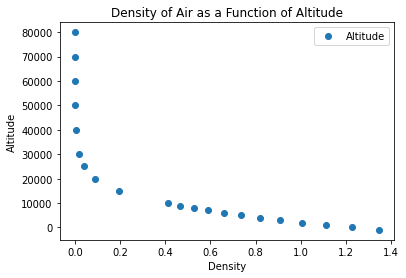

In [ ]:
x = df['Density']

df.plot('Density','Altitude',style='o')
plt.ylabel('Altitude')
plt.title('Density of Air as a Function of Altitude')
plt.show()

Coefficients (from curve_fit)
[ 6.99084729e+04  2.84513773e+00 -5.82953505e+00]
Covariance Matrix (from curve_fit)
[[ 9.50176786e+06  1.43819299e+03 -1.44067875e+03]
 [ 1.43819299e+03  1.00474865e+00 -7.23497856e-01]
 [-1.44067875e+03 -7.23497856e-01  6.50366218e-01]]


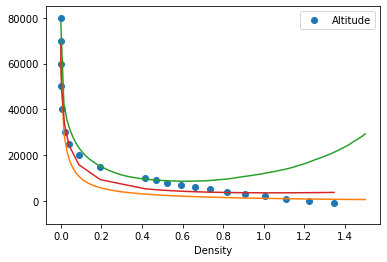

In [ ]:
def fitfunction(x, *paramlist):
  return paramlist[0] * np.exp(paramlist[1]*x + paramlist[2]*(x**(1/2)))

init_vals = [0.0 for x in range(3)]
x = np.array(df['Density'])
y = np.array(df['Altitude'])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

xi = np.linspace(0.0,1.5,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,0.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)

yfit = fitfunction(x, *popt)

df.plot('Density','Altitude',style='o')
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.plot(x, yfit)
axes = plt.gca()
# axes.set_xlim([-0.1,1.5])
axes.set_ylim([-10000,85000.0])
plt.show()

# Evaluation

I believe this fit accurately plots the data at 95% confidence. There are slight deviations from this fit, but not to a significant degree that I believe warrants any changes to the model. However, the upper-bound seems to significantly curve up at higher densities which may cause an overacceptance of outliers in the data. 